# Analysing twitter stream

For this study the tweetpy streamer will be used.

In [1]:
from tweepy.streaming import StreamListener
from tweepy import Stream
from tweepy import OAuthHandler

from textblob import TextBlob

import json
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

### Import keys
These are my personal keys, not included in this file.

In [2]:
import myKeys

api_key = myKeys.api_key
api_secret = myKeys.api_secret
access_token_key = myKeys.access_token_key
access_token_secret = myKeys.access_token_secret

### Create a listener to handle everey tweet

This class defines a handler for the tweet event. This class is the spine of this exploration's processing. It receives every tweet and loads it from the json format, along with the tweet sentiment into a pandas DataFrame. It adds the score of every tweet to a sentimentIntegral variable that stores the result score of the labels being tracked.

In [3]:
class ColorListener(StreamListener):

    def __init__(self):
        self.sentimentIntegral = 0
        self.tweets = pd.DataFrame(columns=('tweet', 'sentiment'))

    def on_data(self, data):
        try:
            tweet = json.loads(data)
            blob = TextBlob(tweet['text'])
            self.sentimentIntegral += blob.sentiment[0]
            print "{0:.2f}".format(round(blob.sentiment[0],2)), "{0:.2f}".format(round(self.sentimentIntegral,2))
            row = pd.Series([tweet['text'], blob.sentiment[0]], index=['tweet', 'sentiment'])
            self.tweets = self.tweets.append(row, ignore_index=True)
        except UnboundLocalError:
            raise UnboundLocalError
        except:
            pass
        return True
    
    def getTotalScore(self):
        return self.sentimentIntegral

    def on_error(self, status):
        print "Error: ", status

### Instance and running

The listener object is created and hooked to the twitter stream with the proper authentication. The stream is later filtered with a specific search term, which is selected to represent a specific social phenomena.

**This cell must be stopped from the toolbar** otherwise it will feed from the tweeter stream without stop. 

In [4]:
cListener = ColorListener()
auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)

stream = Stream(auth, cListener)

# Start reading stream for english tweets with the color words
stream.filter(languages=['en'], track=['red', 'green','blue'])

-0.38 -0.38
0.00 -0.38
0.00 -0.38
0.17 -0.21
-0.20 -0.41
-0.14 -0.55
0.00 -0.55
0.14 -0.41
0.34 -0.07
0.00 -0.07
0.00 -0.07
0.17 0.10
0.27 0.36
0.00 0.36
-0.20 0.16
-0.15 0.01
0.00 0.01
0.00 0.01
0.60 0.61
0.00 0.61
0.20 0.81
0.13 0.94
-0.25 0.69
0.00 0.69
0.19 0.88
-0.20 0.68
-0.15 0.53
0.00 0.53
0.00 0.53
0.07 0.60
0.30 0.90
0.01 0.91
0.00 0.91
0.00 0.91
0.00 0.91
0.00 0.91
0.28 1.19
-0.20 0.99
-0.16 0.83
0.00 0.83
-0.10 0.73
0.13 0.85
0.15 1.00
0.50 1.50
0.00 1.50
-0.08 1.42
-0.20 1.22
0.10 1.32
0.20 1.52
-0.40 1.12
0.00 1.12
-0.25 0.87
-0.33 0.54
-0.07 0.47
-0.30 0.17
0.00 0.17
0.15 0.32
0.85 1.17
0.00 1.17
0.00 1.17
0.00 1.17
-0.20 0.97
0.17 1.14
0.00 1.14
-0.05 1.09
0.09 1.18
0.00 1.18
0.16 1.34
0.70 2.04
0.09 2.13
-0.08 2.05
-0.30 1.75
0.28 2.02
0.00 2.02
0.08 2.11
0.00 2.11
0.00 2.11
0.00 2.11
0.00 2.11
-0.07 2.04
0.24 2.28
0.00 2.28
0.00 2.28
0.00 2.28
0.20 2.48
-0.03 2.46
0.17 2.62
0.00 2.62
-0.09 2.53
-0.20 2.33
-0.20 2.13
-0.08 2.05
0.00 2.05
0.29 2.34
-0.20 2.14
0.21 2.35


KeyboardInterrupt: 

### Analize DataFrame

Now we hawe a pandas dataframe inside the cListener object we can analyze.

In [5]:
df = cListener.tweets
print len(df.index) # Number of rows

1115


In [6]:
df.head() # How the data looks like

,tweet,sentiment
0,RT @5REDVELVET: [OFFICIAL] 160315 RED VELVET #...,-0.375000
1,RT @WampsBraintree: Wamp Train scheduled for 5...,0.000000
2,RT @thickred3x: Order Red &amp; @JovanJordanXX...,0.000000
3,@lipdistrikt Thks 4 following! - Please vote f...,0.166667
4,RT @UFCONFOX: Dustin Poirier vs. Bobby Green j...,-0.200000


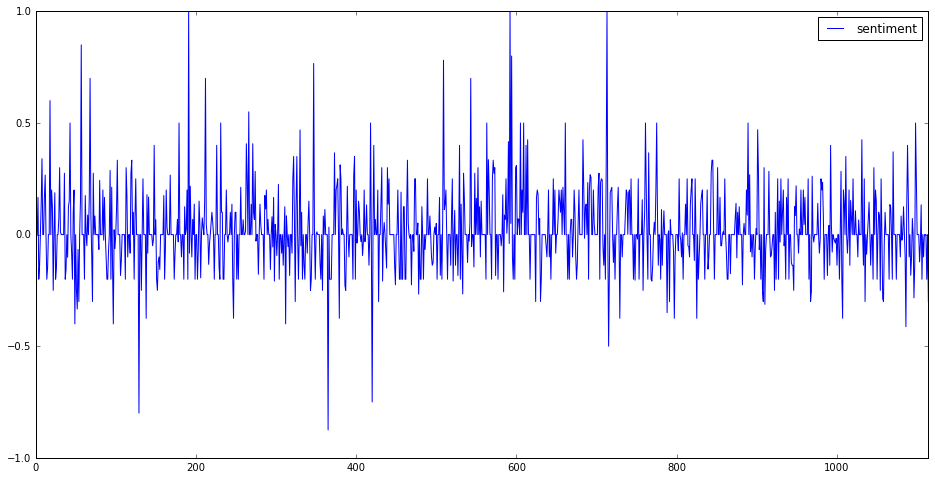

In [9]:
df.plot(figsize=(16, 8)) # Plot the sentiment as a time series

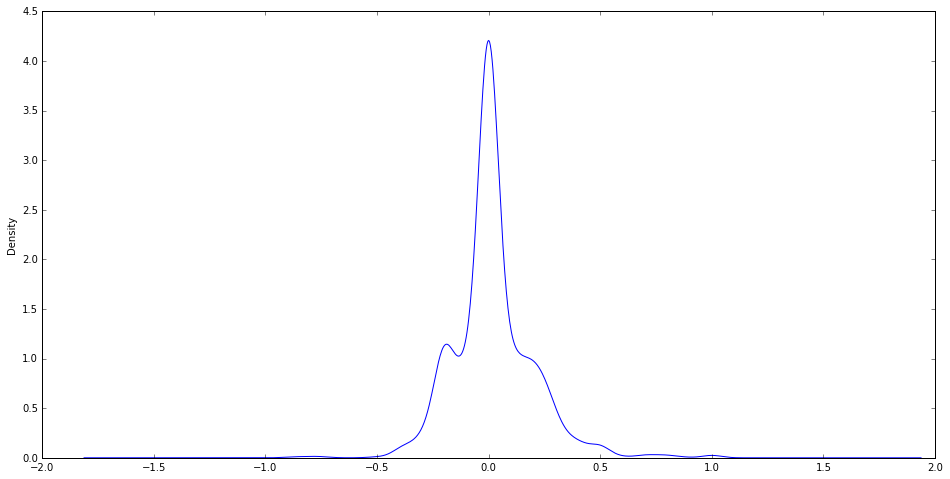

In [10]:
df['sentiment'].plot.kde(figsize=(16, 8))

### Mining text
The regular expresions library will be used to mine text

In [12]:
import re

And a function created to separate the different terms tracked

In [13]:
def wordInText(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return 1
    return 0

Create new columns corresponding to term in tweet.

In [14]:
# New column equals applying the wordInText function to every element of the column text
df['red'] = df['tweet'].apply(lambda tweet: wordInText('red', tweet))
df['green'] = df['tweet'].apply(lambda tweet: wordInText('green', tweet))
df['blue'] = df['tweet'].apply(lambda tweet: wordInText('blue', tweet))

In [15]:
df.head() # How the data looks like

,tweet,sentiment,red,green,blue
0,RT @5REDVELVET: [OFFICIAL] 160315 RED VELVET #...,-0.375000,1,0,0
1,RT @WampsBraintree: Wamp Train scheduled for 5...,0.000000,1,0,0
2,RT @thickred3x: Order Red &amp; @JovanJordanXX...,0.000000,1,0,0
3,@lipdistrikt Thks 4 following! - Please vote f...,0.166667,1,0,0
4,RT @UFCONFOX: Dustin Poirier vs. Bobby Green j...,-0.200000,0,1,0


In [16]:
print df['red'].value_counts()

0    654
1    461
Name: red, dtype: int64


In [17]:
df[['red','green','blue']].sum()

red      461
green    249
blue     410
dtype: int64

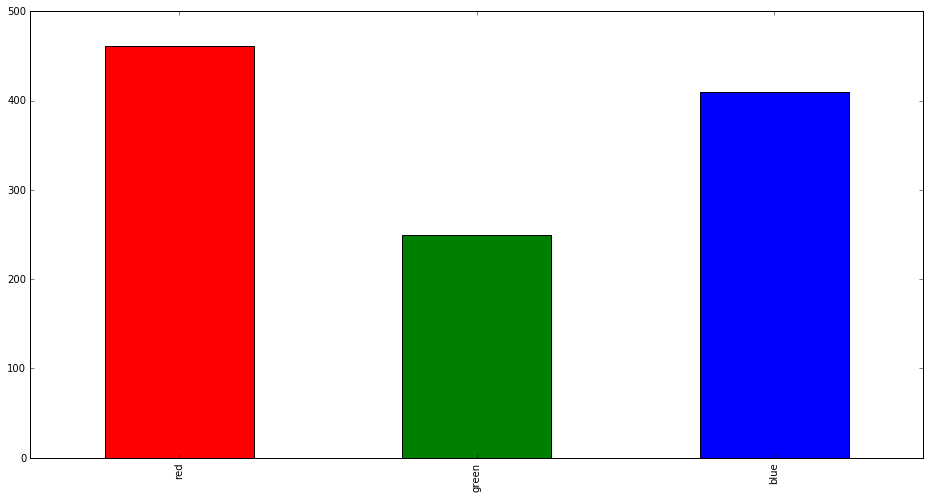

In [18]:
df[['red','green','blue']].sum().plot(kind='bar',color=['r','g','b'],figsize=(16, 8))